<a href="https://colab.research.google.com/github/cybertron002/TSF-GRIPJUNE21/blob/main/TASK_3_Retail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author : Somesh Anand
###GRIPJUNE21

###TASK-3
##OBJECTIVE : Exploratory Data Analysis on Sample Super Store Dataset

In [24]:
#IMPORTING LIBRARIES FOR THE TASK
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [3]:
#Reading Dataset
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.shape
#Shape of the dataset

(9994, 13)

In [6]:
#Checking Null Values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
#Check duplicate
data.duplicated().sum()

17

In [8]:
#drop duplicate
data.drop_duplicates(inplace=True)

In [9]:
#now again check dupicate
data.duplicated().sum()

0

In [10]:
#FINDING ALL THE COLUMNS IN DATASET
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Function return Series with number of distinct observations over requested axis

In [11]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Find the Series containing counts of unique values

In [12]:
data.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales     Quantity  Discount  Profit   
Standard Class  Home Office  United States  Yuma           Arizona     85364        West     Technology       Machines      599.985   5         0.7       -479.9880    1
Second Class    Corporate    United States  Laredo         Texas       78041        Central  Office Supplies  Binders       2.286     3         0.8       -3.6576      1
                                            Little Rock    Arkansas    72209        South    Office Supplies  Envelopes     182.940   3         0.0        85.9818     1
                                            Las Vegas      Nevada      89115        West     Office Supplies  Paper         97.880    2         0.0        48.9400     1
                                                                                                                            32.400    5         0.0        15.87

Dropping colums which are not necessary for EDA

In [13]:
#drop unnecessary
col=['Postal Code']
data=data.drop(columns=col,axis=1)


In [14]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###Grouping through Category and Sub-Category columns.

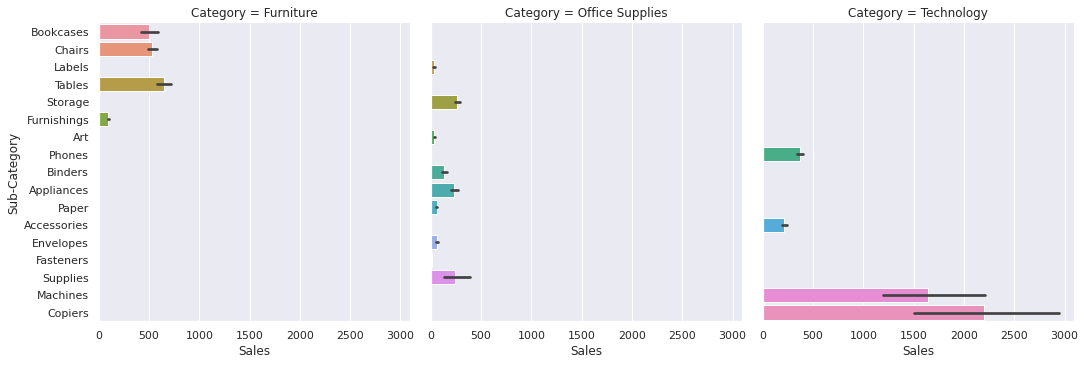

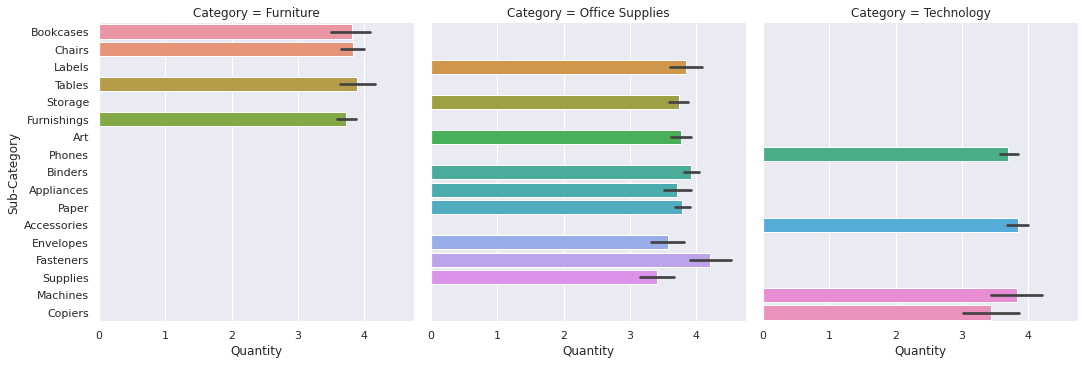

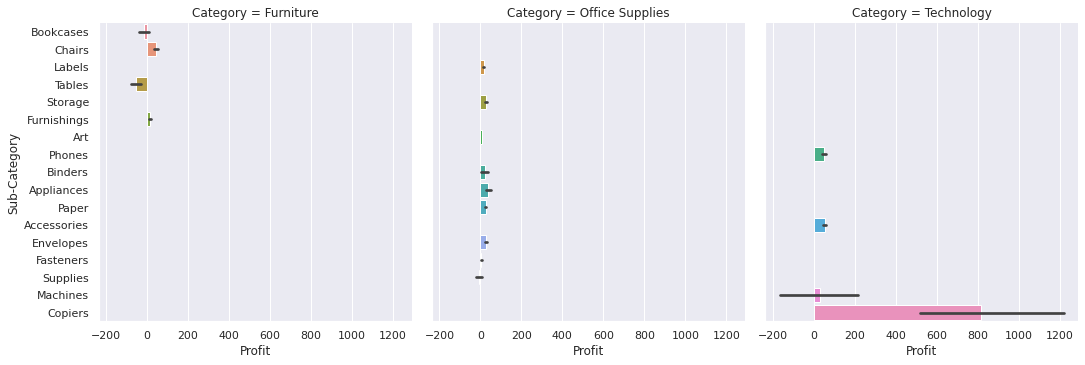

In [15]:
data.groupby("Category")
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=data,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=data,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=data,
                kind='bar')

From these graphs, we can conclude that

* In technology category, Sales are more than other two category.
* In technology category, Copiers and Machines are sold the most.
* Quantity of products are almost sold in equal amount in each category.
* In Furniture category, Bookcases and Tables are incurring a lose.
* In Office Supplies category, there is a very minimal profit in all sub-categories.
* In technology category, Copiers provide the most profit among all others.

#State-wise analysis

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

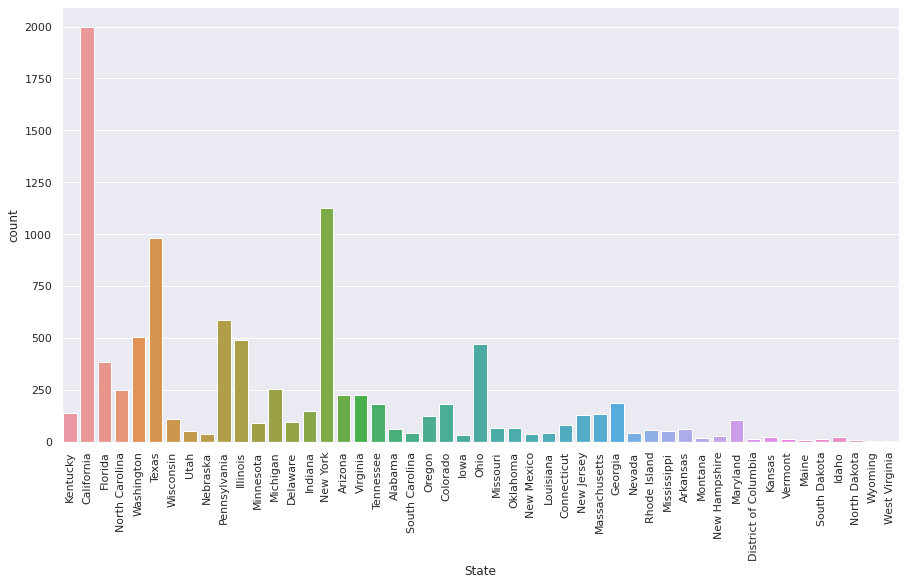

In [16]:
print(data['State'].value_counts())    #Returns the count of each state
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

In [17]:
sorted_sales = data.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = data.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = data.sort_values(['Profit'], 
                                        ascending=False)[:10]

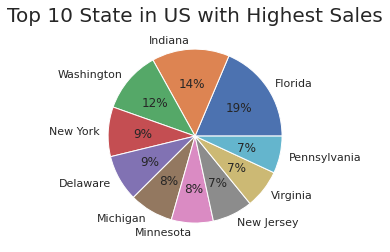

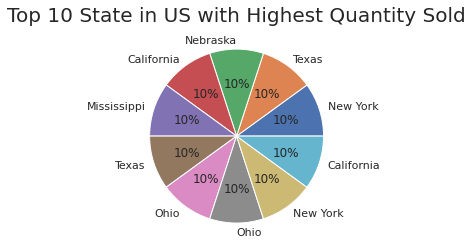

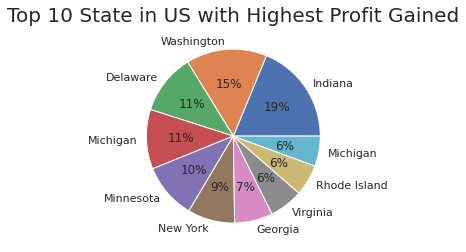

In [18]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that

* Wyoming sales are highest among all but with a profit of only 8%.
* Almost all top 10 states have same quantity sold
* Vermont State gained the highest profit among all.

# Analysis on the basis of Segment

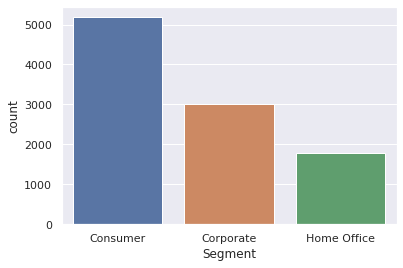

In [19]:
sns.countplot(x=data['Segment'])  

Text(0.5, 1.0, 'Segment-Wise Sales Done')

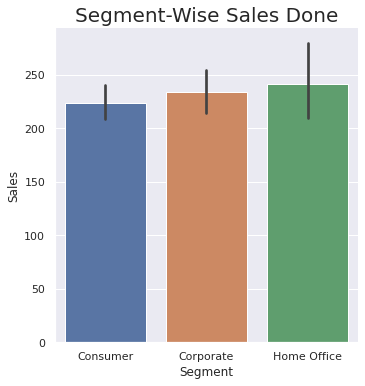

In [20]:
sns.catplot(x="Segment", y="Sales", data=data, kind='bar')
plt.title("Segment-Wise Sales Done", fontsize=20)

Text(0.5, 1.0, 'Segment-Wise Quantity Sold')

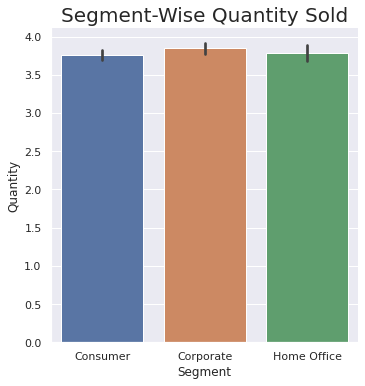

In [21]:
sns.catplot(x="Segment", y="Quantity", data=data, kind='bar')
plt.title("Segment-Wise Quantity Sold", fontsize=20)

Text(0.5, 1.0, 'Segment-Wise Profit Gained')

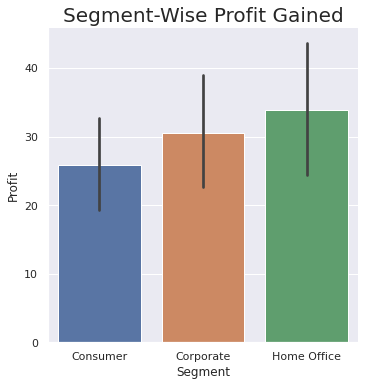

In [22]:
sns.catplot(x="Segment", y="Profit", data=data, kind='bar')
plt.title("Segment-Wise Profit Gained", fontsize=20)

From these graphs, we can conclude that

* All types of Segments have shown almost same number of sales.
* All types of Segments have shown almost same number of quantity sold.
* Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment being the lowest.

# Region wise analysis

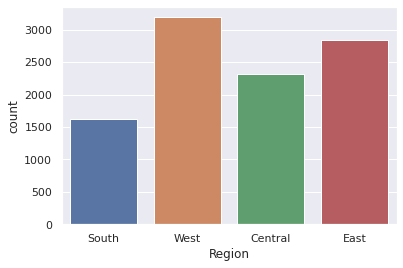

In [23]:
sns.countplot(x=data['Region']) 

<Figure size 1008x504 with 0 Axes>

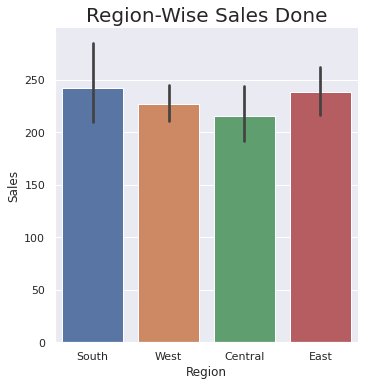

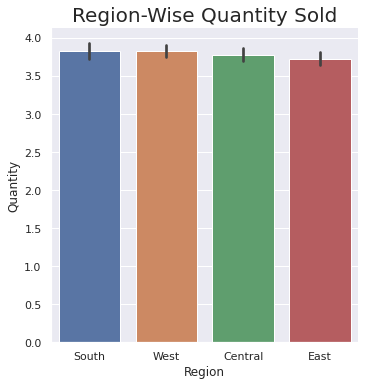

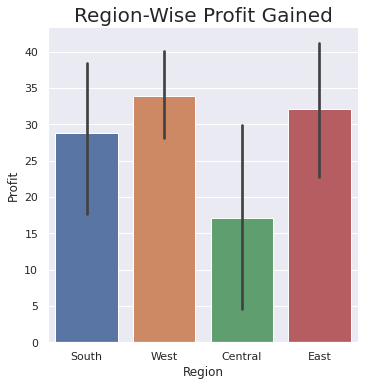

In [26]:
fig = plt.figure(figsize=(14,7))
a = sns.catplot(x='Region',
                y='Sales',
                data=data,
                kind='bar')
plt.title("Region-Wise Sales Done", fontsize=20)

b = sns.catplot(x='Region',
                y='Quantity',
                data=data,
                kind='bar')
plt.title("Region-Wise Quantity Sold", fontsize=20)

c = sns.catplot(x='Region',
                y='Profit',
                data=data,
                kind='bar')
plt.title("Region-Wise Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that

* Sales are more in Southern and Eastern part of US.
* Quantity of products sold in all the regions are almost same and not much of difference.
* Profit gained in Western part of US is comparatively higher followed by Eastern part, Southern part then Central part of US.

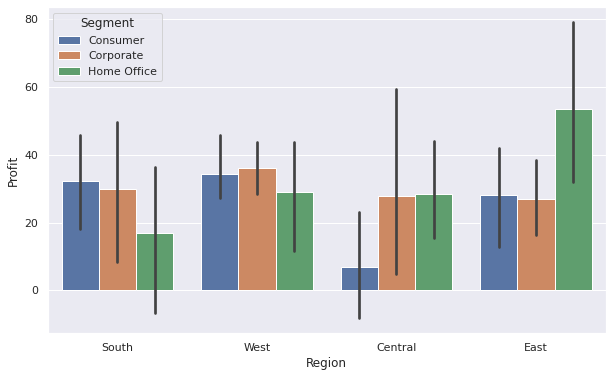

In [28]:
#distribution profit of segment across different regions

plt.figure(figsize=(10,6))
sns.barplot(data= data,x="Region",y="Profit",hue="Segment")
plt.show()

<function matplotlib.pyplot.show>

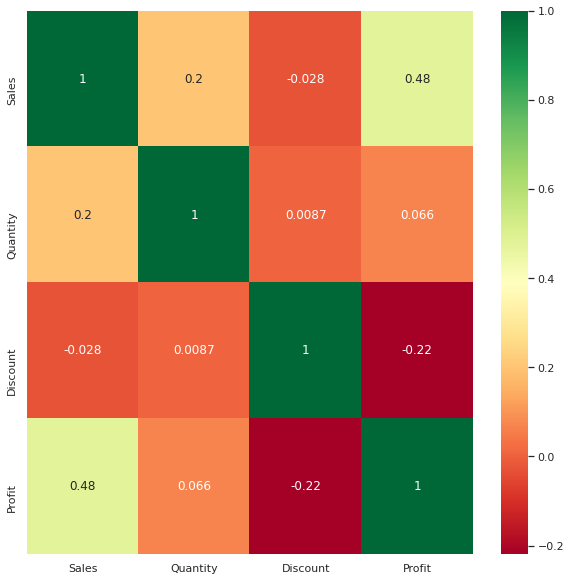

In [30]:
#Heatmap to identify correaltion between numerical columns

plt.figure(figsize=(10,10))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap="RdYlGn")
plt.show